### Capstone Sprint 3: Residential Energy Use Prediction ###
### Project Developed By: Faisal Hameed ###
### Contact: faisal.hameed16@gmail.com
### Submitted On: March 28, 2024 ###

**Introduction** 

This year, at the height of winter and due to extreme cold, the Alberta grid was overstretched, prompting the [Alberta Electric System Operator (AESO)](https://globalnews.ca/news/10231766/alberta-grid-concerns-critical-infrastructure/)  to issue calls for people to limit energy use. This urgent appeal came as several power facilities were on the brink of collapse, posing a significant risk of rolling blackouts. Additionally, B.C. Hydro experienced surging electricity demand, setting new records.
Despite the critical infrastructure being managed by the three tiers of government and select public and private sector groups, every individual plays a crucial role as a stakeholder in this industry and should be empowered to contribute to its resilience and sustainability. This responsibility begins within every household, where a comprehensive understanding of energy consumption habits can collectively exert a significant influence on bolstering the grid's overall resilience and stability. This was the motivation behind leveraging machine learning to understand energy consumption patterns.

**Objective**

In many parts of the world, home energy consumption constitutes a significant expense that residents constantly strive to minimize. Often, we purchase and utilize appliances without fully understanding how external factors influence our usage patterns. Therefore, the aim of this project is to utilize energy data obtained from household appliances to predict expected energy consumption. This endeavor offers several benefits. Firstly, homeowners can accurately size photovoltaics and battery energy storage systems based on the predictions to accommodate additional load. Secondly, detecting and addressing unhealthy usage patterns can lead to a reduction in energy expenditure.

In this first sprint, our aim will be to familiarize ourselves with the data by doing the following:
- Data cleaning
- Exploratory data analysis
- Relationship between each feature and target
- Relationship between features

The diagrams to be drawn are listed as follows:

1. Energy consumption histogram
2. Scatter plots
3. Line graphs

### Dataset

We will be using a real world energy dataset of a [house](https://www.sciencedirect.com/science/article/pii/S0378778816308970?via%3Dihub) containing energy consumed, logged in ten minutes interval for a toal of 137 days.
The dataset contains information about energy consumption of appliances used in the home such as heat recovery ventilation unit, domestic hot water pump, the energy consumption of appliances, lighting, and electric baseboard heaters. The dataset also contains the weather condition at the time of recording, estimated by using the weather measurments from the nearest airport weather station (Chièvres Airport, Belgium), located within 12 km of the house. 

#### Data Dictionary

To help us with our analysis, we take some time to study the data dictionary below. 

Energy data of appliances:
- Appliances energy consumption (numeric) (Wh)
- Light energy consumption (numeric) (Wh)

Weather data
- T1, Temperature in kitchen area (numeric) (&deg;C)
- RH1, Humidity in kitchen area (numeric) (%)
- T2, Temperature in living room area (numeric) (&deg;C)
- RH2, Humidity in living room area (numeric) (%)
- T3, Temperature in laundry room area (numeric) (&deg;C)
- RH3, Humidity in laundry room area (numeric) (%)
- T4, Temperature in office room (numeric) (&deg;C)
- RH4, Humidity in office room (numeric) (%)
- T5, Temperature in bathroom (numeric) (&deg;C)
- RH5, Humidity in bathroom (numeric) (%)
- T6, Temperature outside the building (north side) (numeric) (&deg;C)
- RH6, Humidity outside the building (north side) (numeric) (%)
- T7, Temperature in ironing room (numeric) (&deg;C)
- RH7, Humidity in ironing room (numeric) (%)
- T8, Temperature in teenager room 2 (numeric) (&deg;C)
- RH8, Humidity in teenager room 2 (numeric) (%)
- T9, Temperature in parents room (numeric) (&deg;C)
- RH9, Humidity in parents room (numeric) (%)
- To, Temperature outside (from Chièvres weather station) (&deg;C)
- Pressure (from Chièvres weather station) (numeric) (mmHg)
- RHo, Humidity outside (from Chièvres weather station) (numeric)(%)
- Windspeed (from Chièvres weather station) (numeric) (m/s)
- Visibility (from Chièvres weather station)
- Tdewpoint (from Chièvres weather station) (numeric) (&deg;C)

Other data
- Random Variable 1 (RV_1) (numeric) (dimensionless)
- Random Variable 2 (RV_2) (numeric) (dimesnsionless)
- Number of seconds from midnight (NSM) (numeric) (s)
- Week status (weekend (0) or a weekday (1)) (categorical)

Date data
- Day of week (Monday, Tuesday… Sunday) (categorical)
- Date time stamp

Field of interest:
- Appliances energy consumption (numeric) (Wh)


## Plan of Sprint 1 (aka the Data Science Framework)

1. Acquire data ✅
2. Wrangle, process & clean the data
3. EDA - Exploratory Data Analysis
    - summary statistics
    - plots
    - looking at univariate and bivariate distributions (single columns and interaction between columns)
4. EDA Reflections    
5. Linear Regression
    - sklearn
    - statsmodels
    - handling collinearity
6. Insights and conclusions
    - communicate that efficiently to stakeholders

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [4]:
# load in data
df_energy = pd.read_csv('data/energydata_complete.csv')
df_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
# check for data shape and size
print(f'The dataset consists of {df_energy.shape[0]} rows and {df_energy.shape[1]} columns.')
print(f'The dataset consists of {df_energy.size} elements.')

The dataset consists of 19735 rows and 29 columns.
The dataset consists of 572315 elements.


In [6]:
# check column names
df_energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
# check for data types
df_energy.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

From observing the data types above, we can see that all the columns are numerical, being either int of float data type.
Therefore, we do not expect that their will be any need for binary encoding or dummy variable creation.

## 2. Data Cleaning

Now we will do some initial Exploratory Data Analysis
- Check for Null values
- Check for Duplicated Rows/Columns
- Distribution of Data

In [8]:
# Viewing the columns and the entire dataset
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

From the above, we can see that all the values in each column are non-null, showing that the dataset is clean.
Although the dataset is clean, we still be double-checking further.

In [9]:
# check for null values

df_energy.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

As part of the EDA process, we will unpack the date column to 4 new columns:
- NSM (Number of Seconds from Midnight): Time of the day in seconds
- week_number: week of the year
- week_status: Weekend or Weekday
- day_of_week: Day of the week

In [10]:
# transform the date column
df_energy['date'] = pd.to_datetime(df_energy['date'], format='%Y-%m-%d %H:%M:%S', utc=True)
df_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00+00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00+00:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00+00:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00+00:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00+00:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [11]:
# Transform the NSM column

df_energy['NSM'] = df_energy.date.apply(lambda x: x.hour*3600 + x.minute*60 +x.second)

In [12]:
# Transform the day_of_week


df_energy['day_of_week'] = df_energy.date.apply(lambda x: x.dayofweek)

In [13]:
df_energy['week_status'] = df_energy.day_of_week.apply(lambda x: 0 if (x == 5 or x == 6) else 1)

In [14]:
#check for duplicates

df_energy.duplicated().any()

False

In [15]:
df_energy.duplicated().T.any()

False

### 3. Exploratory Data Analysis

In [16]:
# check for statistic information for all continuous demographic features
df_energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,day_of_week,week_status
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,42907.129465,2.977249,0.722726
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,24940.020831,1.985617,0.447664
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000,0.000000,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,21600.000000,1.000000,0.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,43200.000000,3.000000,1.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,64200.000000,5.000000,1.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,85800.000000,6.000000,1.000000


In [17]:
df_energy.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.695,102.525,10.000,50.000,60.000,100.000,1080.000
lights,19735.0,3.802,7.936,0.000,0.000,0.000,0.000,70.000
T1,19735.0,21.687,1.606,16.790,20.760,21.600,22.600,26.260
RH_1,19735.0,40.260,3.979,27.023,37.333,39.657,43.067,63.360
T2,19735.0,20.341,2.193,16.100,18.790,20.000,21.500,29.857
RH_2,19735.0,40.420,4.070,20.463,37.900,40.500,43.260,56.027
T3,19735.0,22.268,2.006,17.200,20.790,22.100,23.290,29.236
RH_3,19735.0,39.243,3.255,28.767,36.900,38.530,41.760,50.163
T4,19735.0,20.855,2.043,15.100,19.530,20.667,22.100,26.200
RH_4,19735.0,39.027,4.341,27.660,35.530,38.400,42.157,51.090


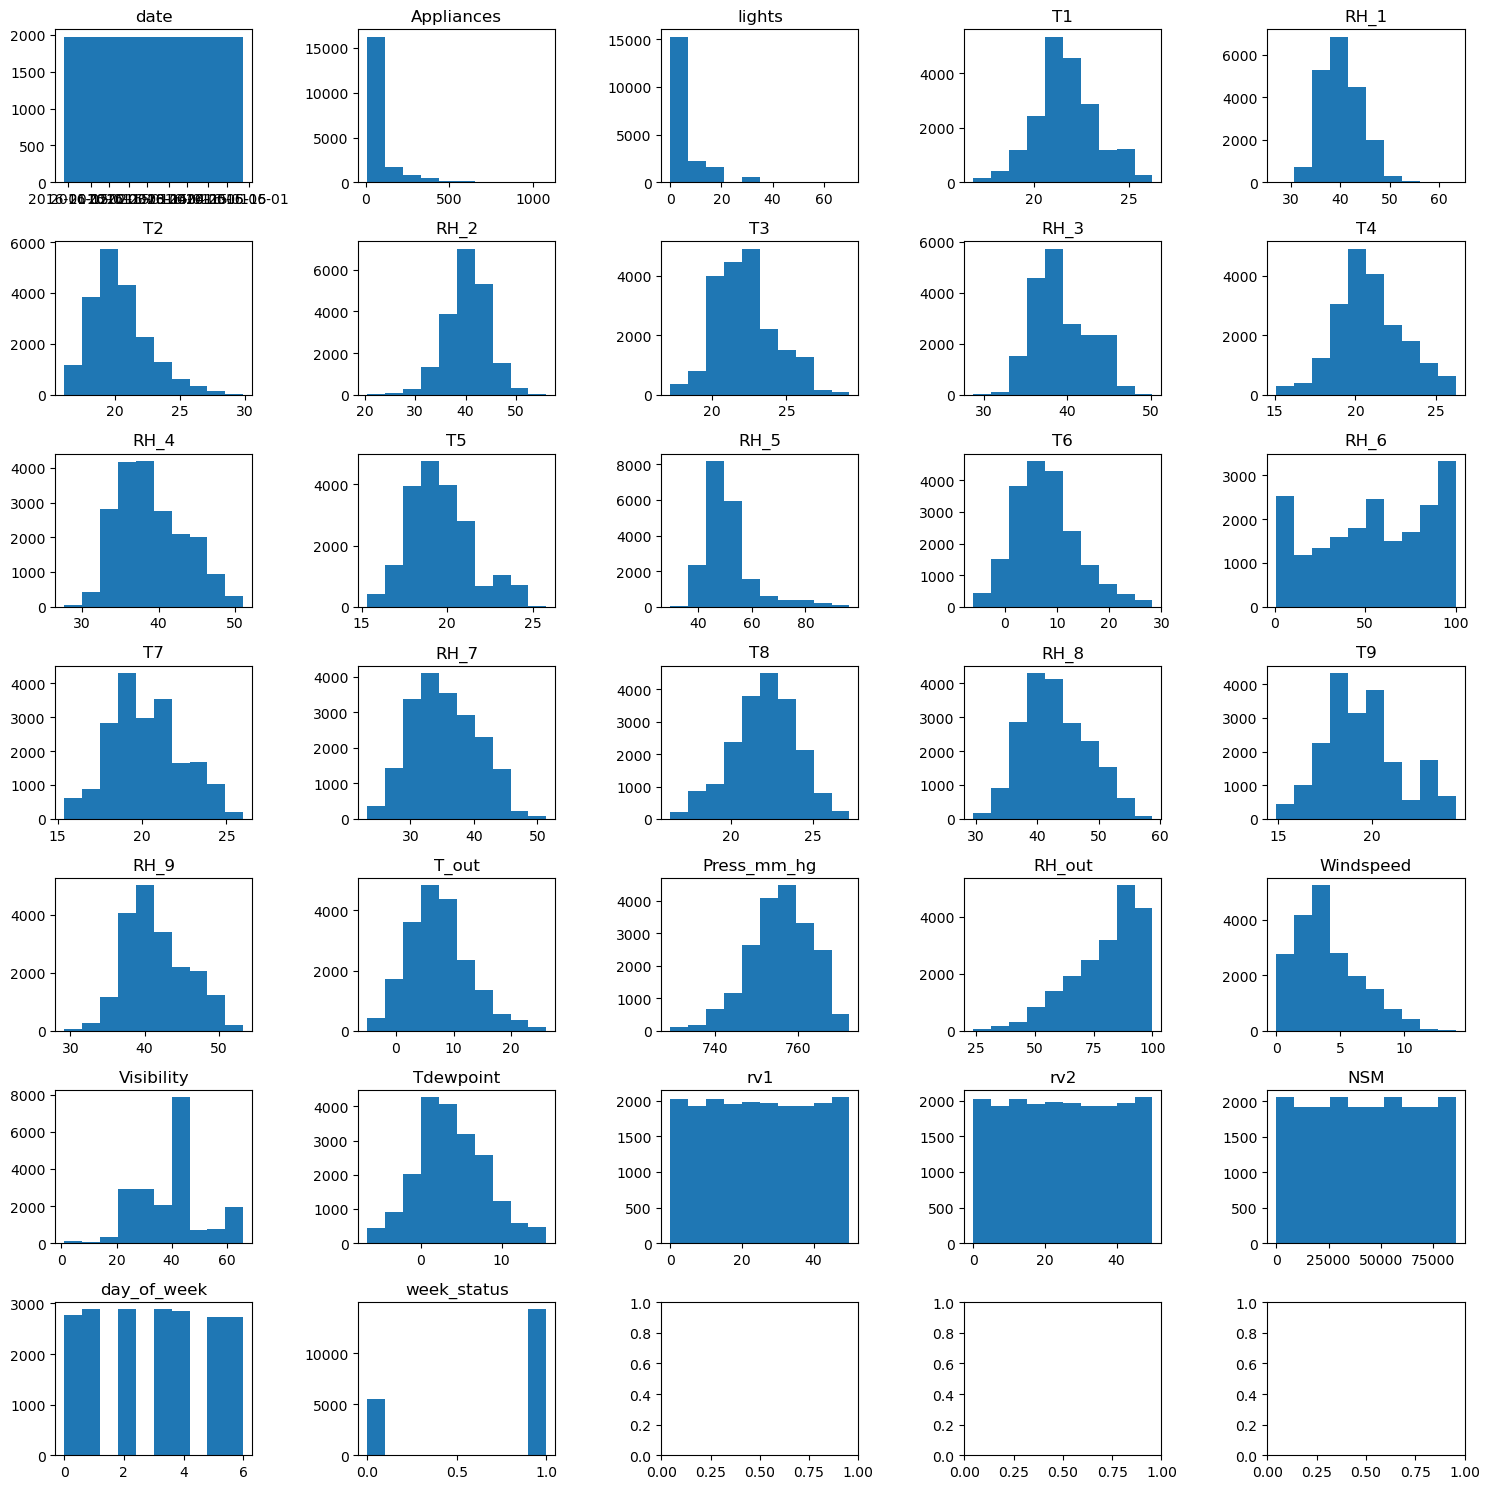

In [18]:
# View column distribution across the dataset

plt.subplots(7, 5, figsize=(15, 15))

count = 1

for col in df_energy.columns:
    plt.subplot(7, 5, count)
    plt.hist(df_energy[col])
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

From the above, we observe a normal distribution in the temperature plots, including T1,
T2, T3, T4, T5, T6, T7, T8, T9, and T_out.

Also, we observe a normal distribution in relative humidity values as seen in RH1, RH2, RH3, 
RH4, RH5, RH7, RH8, RH9. RH6 and RH_out exhibit a different trend.
We will investigate this further in the coming sections.

Lastly, the air pressure, visibility and dew points are also normal in distribution.

In [19]:
df_energy['Appliances'].value_counts()

Appliances
50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
890        1
1070       1
910        1
1080       1
840        1
Name: count, Length: 92, dtype: int64

#### 3.1. EDA 1: Energy Consumption by Appliances and Lights

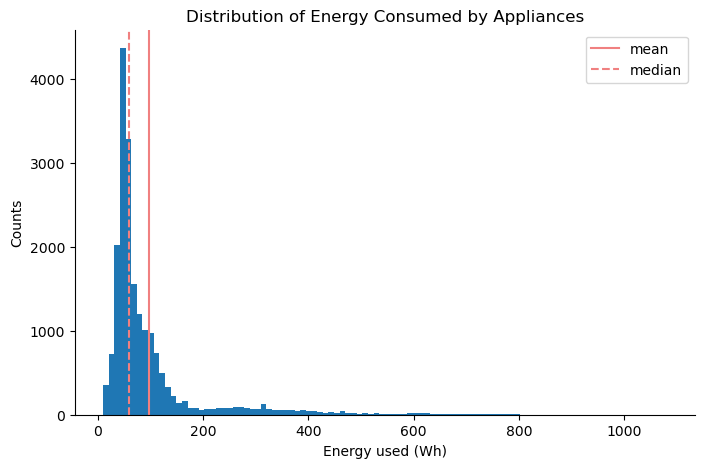

In [20]:
# Histogram plot of the energy consumed by appliances

plt.figure(figsize=(8, 5))

plt.hist(df_energy['Appliances'], bins=100)

plt.axvline(df_energy['Appliances'].mean(), color="lightcoral", label="mean")
plt.axvline(df_energy['Appliances'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of Energy Consumed by Appliances")
plt.ylabel('Counts')
plt.xlabel("Energy used (Wh)")
sns.despine()

plt.legend()
plt.show()

In [21]:
df_energy['lights'].value_counts()

lights
0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: count, dtype: int64

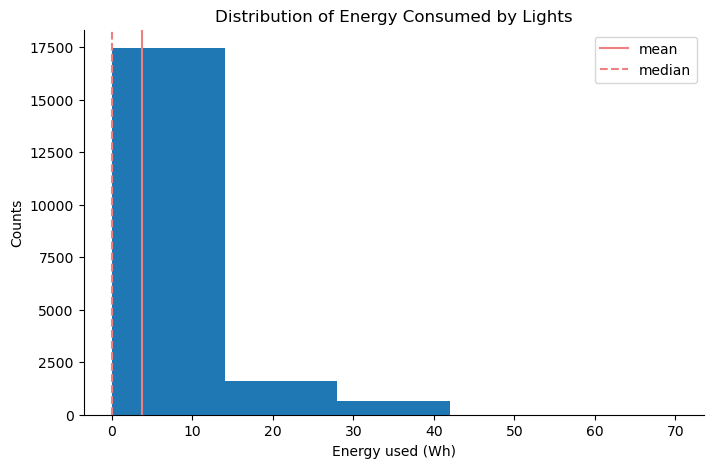

In [22]:
# Histogram plot of the energy consumed by lights

plt.figure(figsize=(8, 5))

plt.hist(df_energy['lights'], bins=5)

plt.axvline(df_energy['lights'].mean(), color="lightcoral", label="mean")
plt.axvline(df_energy['lights'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of Energy Consumed by Lights")
plt.ylabel('Counts')
plt.xlabel("Energy used (Wh)")
sns.despine()

plt.legend()
plt.show()

In the plot below, we will take the nergy consumed by lights and appliances values and aggregate them over each day to get their average, we then plot
to see if differs

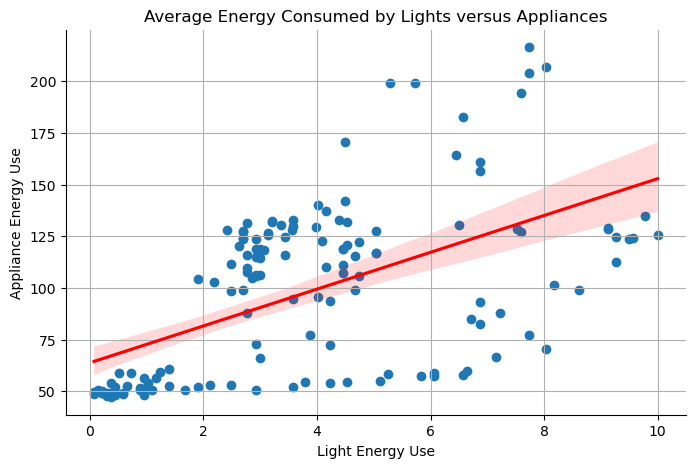

In [23]:
# Scatter plot of energy consumed by light versus appliances averaged every 10 minutes

plt.figure(figsize=(8, 5))

plt.scatter(df_energy.groupby("NSM")["lights"].agg(["mean"]), df_energy.groupby("NSM")["Appliances"].agg(["mean"]))
sns.regplot(data=df_energy.groupby("NSM").mean(), x="lights", y="Appliances", scatter=False, color='red')

plt.title("Average Energy Consumed by Lights versus Appliances")
plt.ylabel('Appliance Energy Use')
plt.xlabel("Light Energy Use")
sns.despine()

#plt.legend()
plt.grid()
plt.show()

The above is the energy consumed by appliances at a point in time averaged over the entire dataset versus the energy consumed by lights at a point in time averaged over the entire dataset for every ten-minute interval. The scatter plot generally shows a fairly proportional relationship between the two features. We can investigate this further below

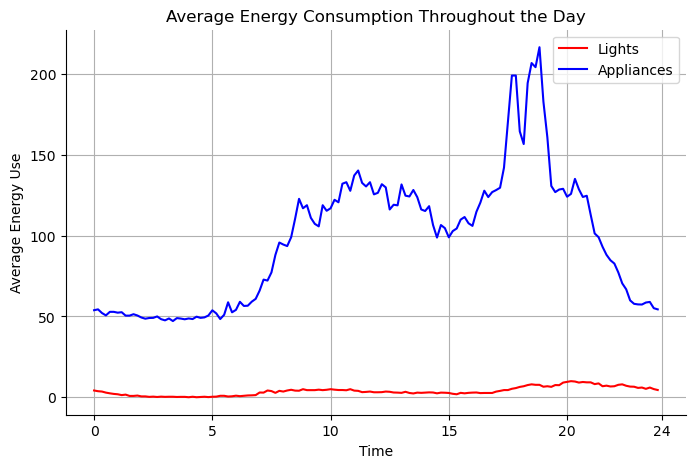

In [24]:
# Line plot of average energy consumed by appliances and lights every 10 minutes of the day

import seaborn as sns

plt.figure(figsize=(8, 5))

# scatter plot for average energy consumed by lights versus time (NSM)
plt.plot(df_energy.groupby("NSM")["lights"].mean().index/3600, df_energy.groupby("NSM")["lights"].mean(), color='red', label='Lights')
plt.plot(df_energy.groupby("NSM")["Appliances"].mean().index/3600, df_energy.groupby("NSM")["Appliances"].mean(), color='blue', label='Appliances')

plt.title("Average Energy Consumption Throughout the Day")
plt.xlabel('Time')
plt.ylabel("Average Energy Use")
plt.xticks([0,5,10,15,20,24])
sns.despine()
plt.legend()
plt.grid()
plt.show()


The above plot shows that the least amount of energy is consumed at midnight, rising and peaking at 11am,
declining from 11 am to 3 pm and then rises again, peaking at a much higher value at 7pm
from which it begins to decline till midnight. It is note worthy that the appliances
and lights have similar trends but on average, the appliances' consumption is higher than lights'.

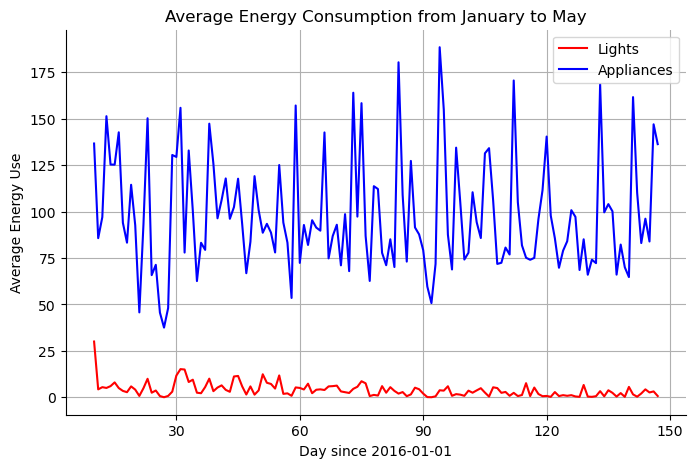

In [25]:
# Line plot of average energy consumed by appliances and lights every day

#extract from date the day number since the start of the year 2016 and get the average energy consumed daily
df_energy['date'] = df_energy['date'].dt.tz_localize(None)

# Calculate the day number since the start of the year 2016
df_energy['day_number'] = (df_energy['date'] - pd.Timestamp('2016-01-01')).dt.days

plt.figure(figsize=(8, 5))

# Scatter plot for average energy consumed by lights versus day since 2016 Jan 1
plt.plot(df_energy.groupby("day_number")["lights"].mean().index, df_energy.groupby("day_number")["lights"].mean(), color='red', label='Lights')
plt.plot(df_energy.groupby("day_number")["Appliances"].mean().index, df_energy.groupby("day_number")["Appliances"].mean(), color='blue', label='Appliances')

plt.title("Average Energy Consumption from January to May")
plt.xlabel('Day since 2016-01-01')
plt.ylabel("Average Energy Use")
plt.xticks([30, 60, 90, 120, 150])
sns.despine()
plt.legend()
plt.grid()
plt.show()

From the above daily average energy consumption, we observe increase in energy use
by applicances, peaking in the months of March and April, then declining 
afterwards. However, the energy consumption by light is seen to decrease and
the reason is because as we approach the summer months, the length of day increases
while night reduces.

#### 3.2. EDA: Temperature, Humidity and Pressure Analysis

We can investigate the distribution of one of the temperature measurements in the house. We suspect that the other temperatures distribution in the house will not be far off.

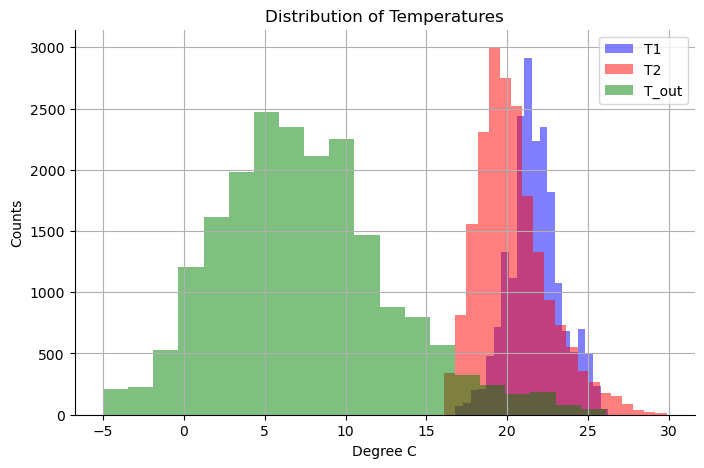

In [26]:
# Histogram plot of Temperatures

plt.figure(figsize=(8, 5))

plt.hist(df_energy['T1'], bins=20, label = 'T1', color='blue',  alpha=0.5)
plt.hist(df_energy['T2'], bins=20, label = 'T2', color='red',  alpha=0.5)
plt.hist(df_energy['T_out'], bins=20, label = 'T_out', color='green',  alpha=0.5)

#plt.axvline(df_energy['T1'].mean(), color="lightcoral", label="mean")
#plt.axvline(df_energy['T1'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of Temperatures")
plt.ylabel('Counts')
plt.xlabel("Degree C")
sns.despine()

plt.legend()
plt.grid()
plt.show()

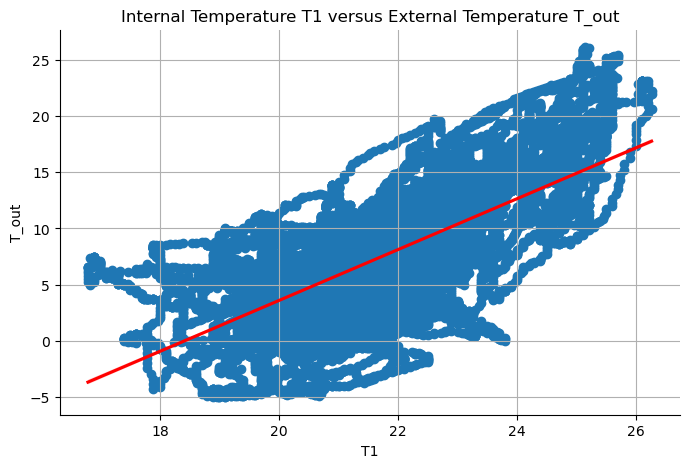

In [27]:
## Scatter plot of internal and external temperature

plt.figure(figsize=(8, 5))

plt.scatter(df_energy["T1"], df_energy["T_out"])
#sns.scatterplot(data=df_energy, x="T1", y="T_out")

sns.regplot(data=df_energy, x="T1", y="T_out", scatter=False, color='red')


plt.title("Internal Temperature T1 versus External Temperature T_out")
plt.ylabel('T_out')
plt.xlabel("T1")
sns.despine()

#plt.legend()
plt.grid()
plt.show()

From the above, we observe that there is a linear relationship between the external temperature and the temperature of the home

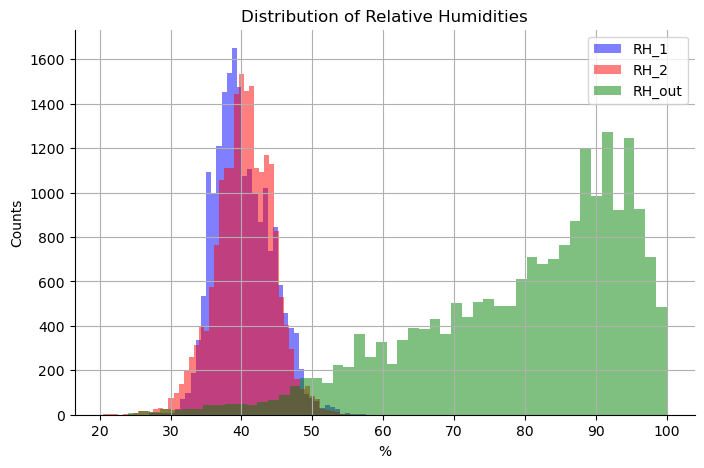

In [28]:
# Histogram plot of relative humidities

plt.figure(figsize=(8, 5))

plt.hist(df_energy['RH_1'], bins=50, label = 'RH_1', color='blue',  alpha=0.5)
plt.hist(df_energy['RH_2'], bins=50, label = 'RH_2', color='red',  alpha=0.5)
plt.hist(df_energy['RH_out'], bins=50, label = 'RH_out', color='green',  alpha=0.5)

#plt.axvline(df_energy['T1'].mean(), color="lightcoral", label="mean")
#plt.axvline(df_energy['T1'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of Relative Humidities")
plt.ylabel('Counts')
plt.xlabel("%")
sns.despine()

plt.legend()
plt.grid()
plt.show()

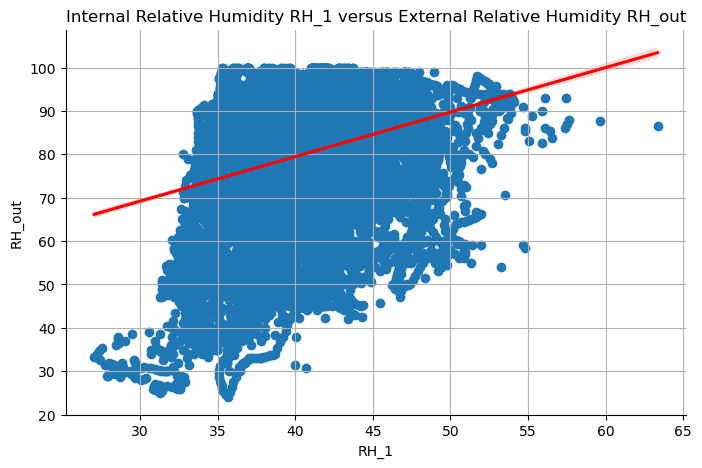

In [29]:
## Scatter plot of internal and external temperature

plt.figure(figsize=(8, 5))

plt.scatter(df_energy["RH_1"], df_energy["RH_out"])
#sns.scatterplot(data=df_energy, x="RH_1", y="RH_out")

sns.regplot(data=df_energy, x="RH_1", y="RH_out", scatter=False, color='red')


plt.title("Internal Relative Humidity RH_1 versus External Relative Humidity RH_out")
plt.ylabel('RH_out')
plt.xlabel("RH_1")
sns.despine()

#plt.legend()
plt.grid()
plt.show()

From the above, we observe that there is a linear relationship between external relative humidity and the relative humidity inside the home. This is already a suspect for multi-collinearity which we will be investigating in latter analysis 

We already know in this work that the energy comsumed by appliances is our target variable. So, we need to understand how our variables relate with eachother
to ensure independence (no multi-collinearity). This being an asumption that is shared by linear and logistic regression models can be checked before model fitting.

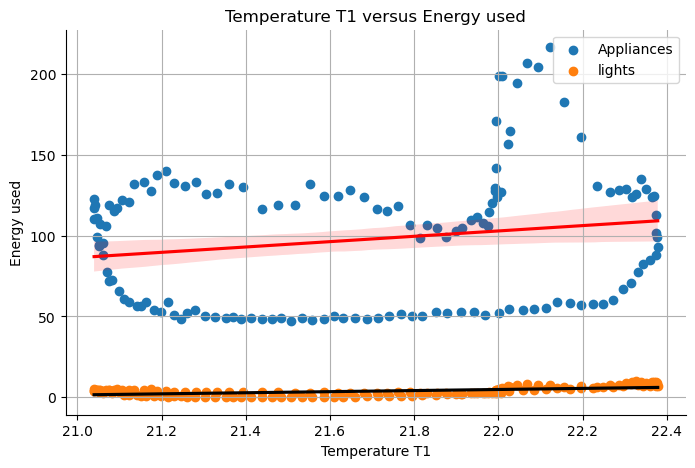

In [30]:
## Scatter plot of Temperature T1 and Appliances

plt.figure(figsize=(8, 5))

plt.scatter(df_energy.groupby("NSM")["T1"].agg(["mean"]), df_energy.groupby("NSM")["Appliances"].agg(["mean"]), label='Appliances')
plt.scatter(df_energy.groupby("NSM")["T1"].agg(["mean"]), df_energy.groupby("NSM")["lights"].agg(["mean"]), label='lights')

sns.regplot(data=df_energy.groupby("NSM").mean(), x="T1", y="Appliances", scatter=False, color='red')
sns.regplot(data=df_energy.groupby("NSM").mean(), x="T1", y="lights", scatter=False, color='black')


plt.title("Temperature T1 versus Energy used")
plt.ylabel('Energy used')
plt.xlabel("Temperature T1")
sns.despine()

plt.legend()
plt.grid()
plt.show()

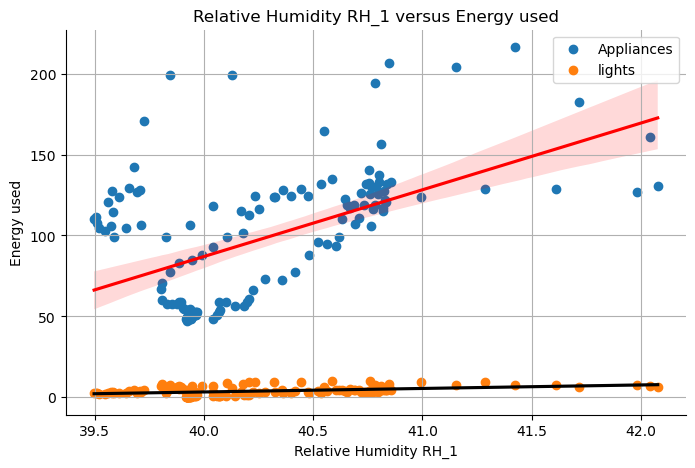

In [31]:
## Scatter plot of Temperature T1 and Appliances

plt.figure(figsize=(8, 5))

plt.scatter(df_energy.groupby("NSM")["RH_1"].agg(["mean"]), df_energy.groupby("NSM")["Appliances"].agg(["mean"]), label='Appliances')
plt.scatter(df_energy.groupby("NSM")["RH_1"].agg(["mean"]), df_energy.groupby("NSM")["lights"].agg(["mean"]), label='lights')

sns.regplot(data=df_energy.groupby("NSM").mean(), x="RH_1", y="Appliances", scatter=False, color='red')
sns.regplot(data=df_energy.groupby("NSM").mean(), x="RH_1", y="lights", scatter=False, color='black')


plt.title("Relative Humidity RH_1 versus Energy used")
plt.ylabel('Energy used')
plt.xlabel("Relative Humidity RH_1")
sns.despine()

plt.legend()
plt.grid()
plt.show()

From the above, we can observe a positive colleration from the relationships internal temperature and internal relative humidity with energy used.

#### 3.3. EDA: Visibility, WindSpeed and Tdewpoint

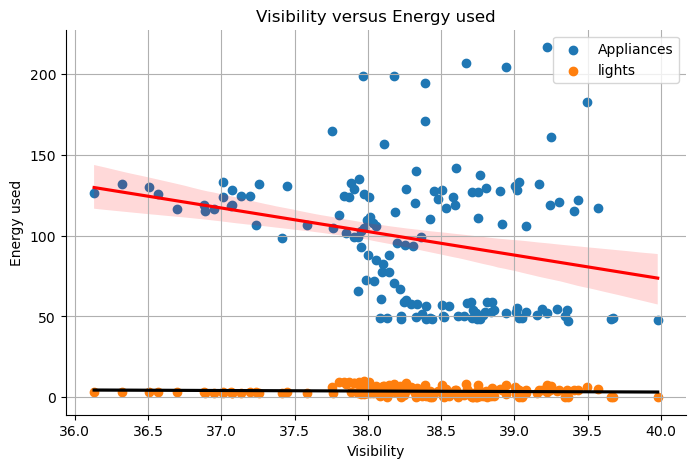

In [32]:
## Scatter plot of Visibility and Appliances

plt.figure(figsize=(8, 5))

plt.scatter(df_energy.groupby("NSM")["Visibility"].agg(["mean"]), df_energy.groupby("NSM")["Appliances"].agg(["mean"]), label='Appliances')
plt.scatter(df_energy.groupby("NSM")["Visibility"].agg(["mean"]), df_energy.groupby("NSM")["lights"].agg(["mean"]), label='lights')

sns.regplot(data=df_energy.groupby("NSM").mean(), x="Visibility", y="Appliances", scatter=False, color='red')
sns.regplot(data=df_energy.groupby("NSM").mean(), x="Visibility", y="lights", scatter=False, color='black')


plt.title("Visibility versus Energy used")
plt.ylabel('Energy used')
plt.xlabel("Visibility")
sns.despine()

plt.legend()
plt.grid()
plt.show()

The above scatter plot shows an inverse relationship between visibility and energy used by Appliances as well as energy used for lights. From this, we understand that less lights is used in the home as visibility rises.

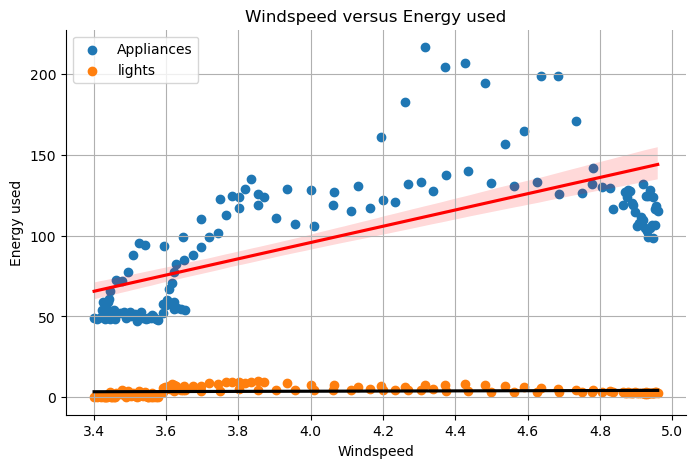

In [33]:
plt.figure(figsize=(8, 5))

plt.scatter(df_energy.groupby("NSM")["Windspeed"].agg(["mean"]), df_energy.groupby("NSM")["Appliances"].agg(["mean"]), label='Appliances')
plt.scatter(df_energy.groupby("NSM")["Windspeed"].agg(["mean"]), df_energy.groupby("NSM")["lights"].agg(["mean"]), label='lights')

sns.regplot(data=df_energy.groupby("NSM").mean(), x="Windspeed", y="Appliances", scatter=False, color='red')
sns.regplot(data=df_energy.groupby("NSM").mean(), x="Windspeed", y="lights", scatter=False, color='black')


plt.title("Windspeed versus Energy used")
plt.ylabel('Energy used')
plt.xlabel("Windspeed")
sns.despine()

plt.legend()
plt.grid()
plt.show()

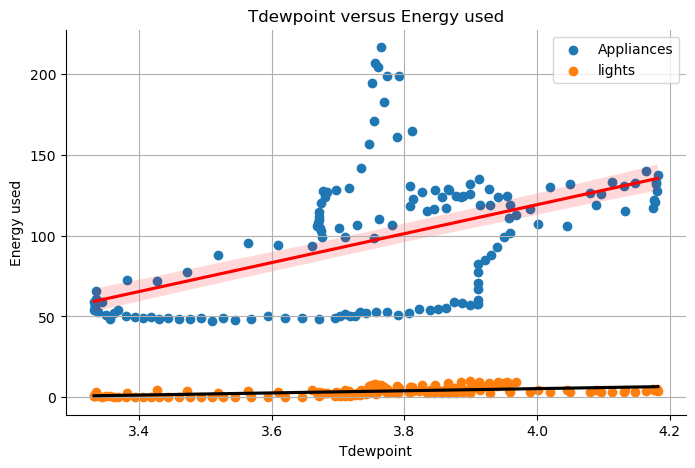

In [34]:
## Scatter plot of Tdewpoint and Appliances

plt.figure(figsize=(8, 5))

plt.scatter(df_energy.groupby("NSM")["Tdewpoint"].agg(["mean"]), df_energy.groupby("NSM")["Appliances"].agg(["mean"]), label='Appliances')
plt.scatter(df_energy.groupby("NSM")["Tdewpoint"].agg(["mean"]), df_energy.groupby("NSM")["lights"].agg(["mean"]), label='lights')

sns.regplot(data=df_energy.groupby("NSM").mean(), x="Tdewpoint", y="Appliances", scatter=False, color='red')
sns.regplot(data=df_energy.groupby("NSM").mean(), x="Tdewpoint", y="lights", scatter=False, color='black')


plt.title("Tdewpoint versus Energy used")
plt.ylabel('Energy used')
plt.xlabel("Tdewpoint")
sns.despine()

plt.legend()
plt.grid()
plt.show()

The three plots above show that the greater the wind speed and Tdewpoint, the more the energy used
by appliances in the home as well as lights while higher wind speed 
resulted to lower energy consumption.

### 4. EDA Reflection and Next Steps

After working on this dataset and coming to the end of EDA, we will highlight a few observations. First, the dataset provided was sufficiently clean, without incorrect data types, duplicates or missing values. However, I have created multiple columns from the date column to enable a more detailed analysis. Important observations:

- Temperature, relative humidity, air pressure, visibility and wind speed atributes as investigated all impact the quantity of energy used by appliances either positively or negatively.

- Energy used by appliances vary at different periods throughout the year


The following will be our next steps for Sprint 2:
- Train a general linear regression model to evaluate by what measure each variable contributes towards energy used.
- Investigate multi-collinearity and drop columns that do not impact performance.
- Train a linear regression model again
- Optimize the trained model to get the best performance out of it and interpret results
- Explore training using other machine learning techniques


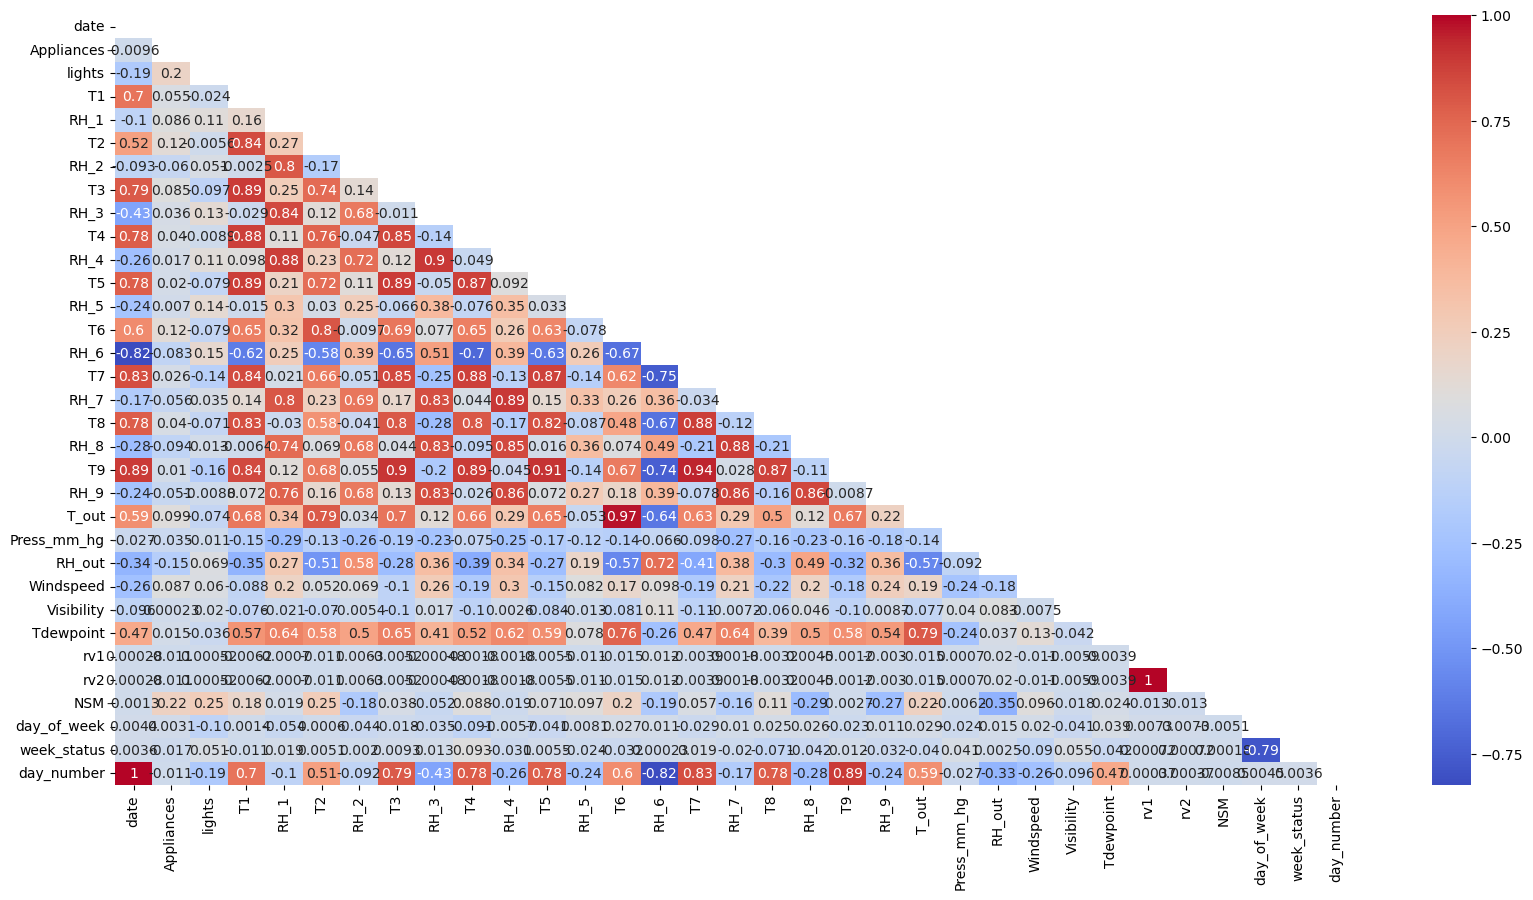

In [35]:
# find the correlation between the variables
corr = df_energy.corr()

# plot the correlation matrix using a heatmap
plt.figure(figsize=(20,10))
matrix = np.triu(df_energy.corr())
sns.heatmap(corr, annot=True, mask=matrix, cmap='coolwarm')
plt.show()

The above is a heat map showing high correlations between variables.
This is where Sprint 2 will take off from.

## 5. Linear Regression

 ### 5.1. Linear Regression: sklearn

In [36]:
# importing of necessary libraries for modeling

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

We can transform the categorical columns such as day_of_week and week_status to dummy variables

In [38]:
# Convert 'day_of_week' to dummy variables
dummy_variables = pd.get_dummies(df_energy['day_of_week'], prefix='day')

# Concatenate the dummy variables with the original DataFrame
df_energy_trans = pd.concat([df_energy, dummy_variables], axis=1).astype(int)

# Drop the original 'day_of_week'
df_energy_trans.drop('day_of_week', axis=1, inplace=True)

df_energy_trans

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,NSM,week_status,day_number,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,1452531600000000000,60,30,19,47,19,44,19,44,19,...,61200,1,10,1,0,0,0,0,0,0
1,1452532200000000000,60,30,19,46,19,44,19,44,19,...,61800,1,10,1,0,0,0,0,0,0
2,1452532800000000000,50,30,19,46,19,44,19,44,18,...,62400,1,10,1,0,0,0,0,0,0
3,1452533400000000000,50,40,19,46,19,44,19,45,18,...,63000,1,10,1,0,0,0,0,0,0
4,1452534000000000000,60,40,19,46,19,44,19,45,18,...,63600,1,10,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,1464369600000000000,100,0,25,46,25,42,27,41,24,...,62400,1,147,0,0,0,0,1,0,0
19731,1464370200000000000,90,0,25,46,25,42,27,41,24,...,63000,1,147,0,0,0,0,1,0,0
19732,1464370800000000000,270,10,25,46,25,42,27,41,24,...,63600,1,147,0,0,0,0,1,0,0
19733,1464371400000000000,420,10,25,46,25,43,26,41,24,...,64200,1,147,0,0,0,0,1,0,0


In [40]:
# Extracting features and target into separate columns
y = df_energy_trans['Appliances']
X = df_energy_trans.drop(columns = ['Appliances', 'date'] ) 

In [38]:
# Separating our data into train and test data

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13814, 37), (5921, 37), (13814,), (5921,))

In [57]:
# Instantiate the model
linreg = LinearRegression()

# Fit the model
linreg.fit(X_train, y_train)

# The intercept
intercept = linreg.intercept_

# The coefficient, notice it returns an array with one spot for each feature
coefficient = linreg.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

print(f'The r2 score for training using linear regression: {round(linreg.score(X_train, y_train),3)}')
print(f'The r2 score for test using linear regression: {round(linreg.score(X_test, y_test),3)}')

Intercept: 6.216480752572394
Coefficients: 2.0582506991720404
The r2 score for training using linear regression: 0.156
The r2 score for test using linear regression: 0.164


### 5.2. Linear Regression with L1 Regularization

Based on the above r2 score, the fitted model poorly fits the data. We would investigate the effect of L1 regularization

In [56]:
from sklearn.linear_model import Ridge, Lasso
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

print(f'The r2 score for training using ridge regression: {round(ridge_reg.score(X_train, y_train),3)}')
print(f'The r2 score for test using ridge regression: {round(ridge_reg.score(X_test, y_test),3)}')

The r2 score for training using ridge regression: 0.156
The r2 score for test using ridge regression: 0.164


**Alternatively, we can use the statsmodel library to fit a linear regression model**

### 5.3. Linear Regression: statsmodels

In [51]:
import statsmodels.api as sm

In [52]:
X_train_withconstant = sm.add_constant(X_train)
X_test_withconstant = sm.add_constant(X_test)
X_train_withconstant.head(5)


,const,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,NSM,week_status,day_number,day_0,day_1,day_2,day_3,day_4,day_5,day_6
9319,1.0,0,20,40,20,39,22,39,21,35,...,36600,1,75,0,0,1,0,0,0,0
6041,1.0,0,21,46,19,46,21,42,20,45,...,57000,1,52,1,0,0,0,0,0,0
4332,1.0,0,20,52,20,43,20,41,19,43,...,68400,1,40,0,0,1,0,0,0,0
1880,1.0,0,21,43,21,42,20,45,17,46,...,66000,0,23,0,0,0,0,0,0,1
12675,1.0,10,21,43,20,42,24,40,21,39,...,63000,1,98,0,0,0,0,1,0,0


In [53]:
#1. Instantiate Model
myreg = sm.OLS(y_train, X_train_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myreg_results = myreg.fit()

# Looking at the summary
myreg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     79.23
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:33:31   Log-Likelihood:                -82463.
No. Observations:               13814   AIC:                         1.650e+05
Df Residuals:                   13779   BIC:                         1.653e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -28.6656     81.469     -0.352      0.725    -188.356     131.025
lights          2.1091      0.116     18.243      0.000       1.883       2.336
T1             -1.3767      1.580     -0.872      0.383      -4.473       1.720
RH_1           13.3024      0.724     18.386      0.000      11.884      14.721
T2            -10.9247      1.467     -7.446      0.000     -13.800      -8.049
RH_2           -9.4896      0.761    -12.464      0.000     -10.982      -7.997
T3             18.8016      1.158     16.240      0.000      16.532      21.071
RH_3            4.8129      0.809      5.949      0.000       3.227       6.399
T4             -2.6007      1.129     -2.304      0.021      -4.813      -0.388
RH_4           -2.0985      0.735     -2.856      0.004      -3.539      -0.658
T5             -1.5489      1.270     -1.219      0.223      -4.039       0.941
RH_5           -0.0745      0.106     -0.703      0.482      -0.282       0.133
T6              6.1887      0.707      8.752      0.000       4.803       7.575
RH_6            0.0535      0.090      0.596      0.551      -0.122       0.229
T7              1.0800      1.373      0.787      0.431      -1.610       3.770
RH_7           -1.8410      0.501     -3.674      0.000      -2.823      -0.859
T8              5.1423      1.086      4.736      0.000       3.014       7.271
RH_8           -3.3252      0.465     -7.156      0.000      -4.236      -2.414
T9             -8.7486      1.752     -4.992      0.000     -12.184      -5.313
RH_9           -0.6431      0.512     -1.256      0.209      -1.647       0.361
T_out          -4.9885      1.281     -3.895      0.000      -7.499      -2.478
Press_mm_hg     0.0472      0.129      0.367      0.714      -0.205       0.299
RH_out          0.0961      0.271      0.354      0.723      -0.435       0.628
Windspeed       1.8786      0.424      4.432      0.000       1.048       2.709
Visibility      0.1205      0.070      1.727      0.084      -0.016       0.257
Tdewpoint      -0.2328      1.280     -0.182      0.856      -2.741       2.276
rv1            -0.0408      0.028     -1.463      0.143      -0.095       0.014
rv2            -0.0408      0.028     -1.463      0.143      -0.095       0.014
NSM             0.0003    4.6e-05      5.942      0.000       0.000       0.000
week_status   -13.2643     23.957     -0.554      0.580     -60.224      33.695
day_number     -0.1681      0.077     -2.169      0.030      -0.320      -0.016
day_0           1.5256      5.255      0.290      0.772      -8.775      11.826
day_1         -11.4916      5.239     -2.193      0.028     -21.761      -1.222
day_2          -5.8064      5.180     -1.121      0.262     -15.959       4.346
day_3          -7.2055      5.091     -1.415      0.157     -17.185       2.774
day_4           9.7135      5.128      1.89

The r2 score obtained using this method is exactly the same as seen earlier. Furthermore, we will examine the features with p-values lesser than threshold of 5% which are as follows:
- lights
- RH_1
- T_2
- RH_2
- T_3
- RH_3
- T_4
- RH_4
- T_6
- RH_7
- T_8
- RH_8
- T_9
- T_out
- Windspeed
- Visibility
- NSM
- day_number

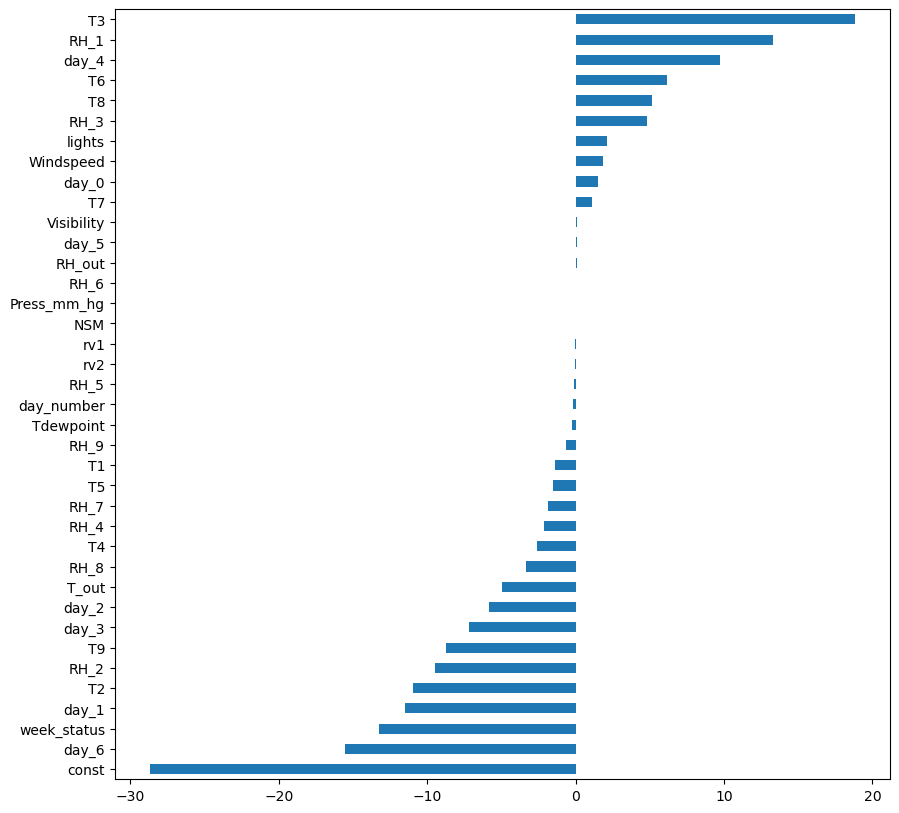

In [54]:
plt.figure(figsize=(10,10))
myreg_results.params.sort_values(ascending=True).plot(kind='barh')
plt.show()

### 5.4. Linear Regression: Handling Multicollinearity

The above shows the coefficients of the linear regression model which in many cases large coefficients have p-value less than alpha. We can use variance inflation factor (VIF) to check for multicollinearity in addition to the p-values and correlation coefficients.

In [55]:
# Let's now run VIF for the columns 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# We use ther original dataset
X_withconstant = sm.add_constant(X)

In [57]:
# View the X_withconstant
X_withconstant.head()

,const,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,NSM,week_status,day_number,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,1.0,30,19,47,19,44,19,44,19,45,...,61200,1,10,1,0,0,0,0,0,0
1,1.0,30,19,46,19,44,19,44,19,45,...,61800,1,10,1,0,0,0,0,0,0
2,1.0,30,19,46,19,44,19,44,18,45,...,62400,1,10,1,0,0,0,0,0,0
3,1.0,40,19,46,19,44,19,45,18,45,...,63000,1,10,1,0,0,0,0,0,0
4,1.0,40,19,46,19,44,19,45,18,45,...,63600,1,10,1,0,0,0,0,0,0


In [58]:
variance_inflation_factor(X_withconstant, 1)

1.2906956710419066

In [59]:
# Traverse through the columns

pd.Series([variance_inflation_factor(X_withconstant.values, i) for i in range(X_withconstant.shape[1])], 
          index= X_withconstant.columns)[1:]

/Users/amna/anaconda3/envs/mycapstone_env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/amna/anaconda3/envs/mycapstone_env/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


lights          1.290696
T1             10.265527
RH_1           12.668097
T2             16.228558
RH_2           14.795440
T3              8.586625
RH_3           10.683181
T4              8.358578
RH_4           15.545086
T5              8.550411
RH_5            1.378215
T6             27.962236
RH_6           11.944167
T7             13.166620
RH_7           10.135165
T8              7.065143
RH_8            8.978588
T9             19.445815
RH_9            6.985237
T_out          69.328804
Press_mm_hg     1.391067
RH_out         25.333823
Windspeed       1.618837
Visibility      1.053084
Tdewpoint      39.833561
rv1                  inf
rv2                  inf
NSM             2.033902
week_status          inf
day_number     14.259989
day_0                inf
day_1                inf
day_2                inf
day_3                inf
day_4                inf
day_5                inf
day_6                inf
dtype: float64

We drop rv1, rv2, day_0, day_1, day_2, day_3, day_4, day_5 and day_6 features, then, investigate the linear regression model training.

In [78]:
# Drop rv1, rv2, day_0 and day_1 features and 

# Extracting features and target into separate columns

y = df_energy_trans['Appliances']
X = df_energy_trans.drop(columns = ['Appliances', 'date', 'rv1', 'rv2', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6'] ) 

# Separating our data into train and test data

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train_withconstant = sm.add_constant(X_train)
X_test_withconstant = sm.add_constant(X_test)
X_train_withconstant.head(5)

,const,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,NSM,week_status,day_number
13165,1.0,0,21,43,19,44,23,40,22,39,...,44,7,751,88,2,40,5,11400,1,102
17776,1.0,0,24,38,22,41,24,33,25,38,...,45,8,754,79,3,24,5,13200,0,134
10096,1.0,30,22,38,20,38,22,36,21,36,...,36,7,759,78,1,30,3,70800,1,80
2189,1.0,0,20,51,19,49,20,45,18,46,...,47,9,759,86,8,25,7,78600,1,25
7140,1.0,0,20,35,17,37,20,36,19,33,...,39,0,761,98,2,30,0,25200,1,60


In [79]:
#1. Instantiate Model
myreg1 = sm.OLS(y_train, X_train_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myreg1_results = myreg1.fit()

# Looking at the summary
myreg1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     91.08
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:54:40   Log-Likelihood:                -82165.
No. Observations:               13814   AIC:                         1.644e+05
Df Residuals:                   13785   BIC:                         1.646e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          34.7322    106.723      0.325      0.745    -174.459     243.924
lights          1.9129      0.112     17.036      0.000       1.693       2.133
T1             -1.3102      1.543     -0.849      0.396      -4.335       1.715
RH_1           12.7590      0.709     18.000      0.000      11.370      14.148
T2            -11.0398      1.437     -7.681      0.000     -13.857      -8.222
RH_2           -9.3901      0.744    -12.620      0.000     -10.849      -7.932
T3             19.8020      1.120     17.681      0.000      17.607      21.997
RH_3            3.6603      0.777      4.709      0.000       2.137       5.184
T4             -4.0605      1.087     -3.734      0.000      -6.192      -1.929
RH_4           -1.9824      0.717     -2.767      0.006      -3.387      -0.578
T5             -0.3957      1.239     -0.319      0.750      -2.825       2.034
RH_5           -0.0511      0.104     -0.494      0.621      -0.254       0.152
T6              6.2732      0.698      8.986      0.000       4.905       7.642
RH_6            0.0038      0.088      0.044      0.965      -0.169       0.177
T7              3.0738      1.343      2.290      0.022       0.442       5.705
RH_7           -2.3696      0.490     -4.837      0.000      -3.330      -1.409
T8              5.0775      1.055      4.811      0.000       3.009       7.146
RH_8           -3.2721      0.449     -7.285      0.000      -4.152      -2.392
T9            -10.4398      1.712     -6.099      0.000     -13.795      -7.084
RH_9           -0.1808      0.501     -0.361      0.718      -1.163       0.802
T_out          -4.6079      1.265     -3.643      0.000      -7.087      -2.128
Press_mm_hg    -0.0156      0.125     -0.125      0.900      -0.260       0.229
RH_out          0.2986      0.268      1.114      0.265      -0.227       0.824
Windspeed       1.9534      0.410      4.766      0.000       1.150       2.757
Visibility      0.1283      0.069      1.867      0.062      -0.006       0.263
Tdewpoint       0.3601      1.253      0.287      0.774      -2.097       2.817
NSM             0.0003   4.51e-05      5.896      0.000       0.000       0.000
week_status    -7.4512      1.869     -3.987      0.000     -11.115      -3.788
day_number     -0.3057      0.074     -4.109      0.000      -0.452      -0.160
==============================================================================
Omnibus:                     9865.185   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152808.933
Skew:                           3.351   Prob(JB):                         0.00
Kurtosis:                      17.851   Cond. No.                     6.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covar

We will investigate the VIF scores again to check if multi-collinearity has been tackled.

In [85]:
# Calculate VIF for each independent variable
vif_series = pd.Series([variance_inflation_factor(X_train_withconstant.values, i) for i in range(X_train_withconstant.shape[1])], 
                       index=X_train_withconstant.columns)

# Exclude the constant column
vif_series = vif_series[1:]
vif_series 

lights          1.261164
T1             10.144161
RH_1           12.616132
T2             16.205489
RH_2           14.712134
T3              8.329784
RH_3           10.268669
T4              8.127039
RH_4           15.484356
T5              8.551259
RH_5            1.366162
T6             28.068681
RH_6           12.049899
T7             13.097257
RH_7           10.001097
T8              6.942358
RH_8            8.759447
T9             19.211806
RH_9            6.944612
T_out          70.022835
Press_mm_hg     1.382299
RH_out         25.677293
Windspeed       1.568643
Visibility      1.053653
Tdewpoint      39.832846
NSM             2.028735
week_status     1.125529
day_number     13.843485
dtype: float64

After investigating the VIF and subsequently dropping columns to reduce collinearity, we trained a
linear regression model again but obtained r2 of 0.156, which is approximately equal to the previous r2 of 0.16 that we got earlier, indicating that multi-collinearity was not responsible for the below par training and test r2 scores.

Using sklearn for linear regression confirms prior result. 

In [64]:
# Instantiate the model
linreg1 = LinearRegression()

# Fit the model
linreg1.fit(X_train, y_train)

#Print r2 score
print(f'The R2 training score: {linreg1.score(X_train, y_train)}')

print(f'The R2 test score: {linreg1.score(X_test, y_test)}')

The R2 training score: 0.15450952482854108
The R2 test score: 0.15236446752660338


We can conclude based on our results that our baseline model, linear regression performs poorly in training our dataset even after applying regularization and handling collinearity. Therefore,in the subsequent sprint, we will be investigating neural networks, random forest regressor, SVM and GBM.

### 5.5. Gradient Boosting Regressor

In [59]:
### Sprint 3
# Separating our data into train and test data
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate the model
gbr = GradientBoostingRegressor(n_estimators=50) # setting max features is not needed here as our dataset only has 2 features.

# Fit the model
gbr.fit(X_train, y_train)

# Examine the training and test scores
print(f'The training R2 score: {gbr.score(X_train, y_train)}')
print(f'The test R2 score: {gbr.score(X_test, y_test)}')

The training R2 score: 0.28833166337120797
The test R2 score: 0.2515489375882075


### 5.6. Random Forest Regressor

In [60]:
# Separating our data into train and test data
from sklearn.ensemble import RandomForestRegressor

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate the model
regr = GradientBoostingRegressor(n_estimators=50) # setting max features is not needed here as our dataset only has 2 features.

# Fit the model
regr.fit(X_train, y_train)

# Examine the training and test scores
print(f'The training R2 score: {gbr.score(X_train, y_train)}')
print(f'The test R2 score: {gbr.score(X_test, y_test)}')

The training R2 score: 0.2744259187235223
The test R2 score: 0.2847751310617511
